<a href="https://colab.research.google.com/github/yossrlouati/facial-emotion-recognition/blob/main/Emotion_recognition_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Download Data from kaggle

In [ ]:
import os

# Configure kaggle
os.chdir('/root/')
!mkdir -p .kaggle
os.chdir('/root/.kaggle')
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1Y-o0TVcjehM8SZB3Nt8U3xkyeQu-Nse-' -O kaggle.json > /dev/null 2>&1
!ls /root/.kaggle

# Set permissions 
!chmod 600 /root/.kaggle/kaggle.json

# Create data folder
os.chdir('/content/')
!rm -rf data
!mkdir data
os.chdir('data')
!pwd

# Download data
!pip install -q kaggle
! kaggle datasets download jonathanoheix/face-expression-recognition-dataset

# Unzip data
!unzip *.zip 

Le flux de sortie a été tronqué et ne contient que les 5000 dernières lignes.
  inflating: images/validation/fear/8797.jpg  
  inflating: images/validation/fear/8818.jpg  
  inflating: images/validation/fear/886.jpg  
  inflating: images/validation/fear/9037.jpg  
  inflating: images/validation/fear/9040.jpg  
  inflating: images/validation/fear/9101.jpg  
  inflating: images/validation/fear/911.jpg  
  inflating: images/validation/fear/9179.jpg  
  inflating: images/validation/fear/9205.jpg  
  inflating: images/validation/fear/9232.jpg  
  inflating: images/validation/fear/9251.jpg  
  inflating: images/validation/fear/9261.jpg  
  inflating: images/validation/fear/9281.jpg  
  inflating: images/validation/fear/9302.jpg  
  inflating: images/validation/fear/9333.jpg  
  inflating: images/validation/fear/9369.jpg  
  inflating: images/validation/fear/9370.jpg  
  inflating: images/validation/fear/9474.jpg  
  inflating: images/validation/fear/949.jpg  
  inflating: images/validation/f

In [ ]:
pip install face_recognition

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 100.1 MB 1.2 MB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566185 sha256=10fd58d79a19d87138d1f6de9af6eca7483bfe28325b3c9bfc7680a04fe799a2
  Stored in directory: /root/.cache/pip/wheels/b4/4b/8f/751e99d45f089bdf366a7d3e5066db3c2b84a62e4377f534d7
Successfully built face-recognition-models


# Importing Required Libraries

In [ ]:
import numpy as np
import pandas as pd
import os
import glob
import cv2

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot
from matplotlib.image import imread

import face_recognition
import PIL.Image
import PIL.ImageDraw

from operator import itemgetter, attrgetter

import imageio
from mlxtend.image import extract_face_landmarks

from os import makedirs,listdir
from random import seed
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# **.Fearures Extraction**


## for a single picture

In [ ]:
img = imageio.imread("/content/data/images/train/angry/10.jpg")
landmarks = extract_face_landmarks(img)
print(landmarks.shape)

(68, 2)


<ipython-input-6-d956ef507c7c>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = fig.add_subplot(1, 3, 2)


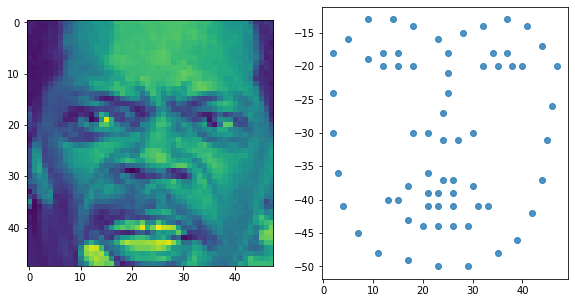

In [ ]:
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(1, 3, 1)
ax.imshow(img)
ax = fig.add_subplot(1, 3, 2)
ax.scatter(landmarks[:, 0], -landmarks[:, 1], alpha=0.8)
ax = fig.add_subplot(1, 3, 2)


plt.show()

In [ ]:
input_image = face_recognition.load_image_file("/content/data/images/train/angry/10.jpg")
#input_image

In [ ]:
facce_landmarks = face_recognition.face_landmarks(input_image)
facce_landmarks[0]


{'chin': [(2, 18),
  (2, 24),
  (2, 30),
  (3, 36),
  (4, 41),
  (7, 45),
  (11, 48),
  (17, 49),
  (23, 50),
  (29, 50),
  (35, 48),
  (39, 46),
  (42, 42),
  (44, 37),
  (45, 31),
  (46, 26),
  (47, 20)],
 'left_eyebrow': [(5, 16), (9, 13), (14, 13), (18, 14), (23, 16)],
 'right_eyebrow': [(28, 15), (32, 14), (37, 13), (41, 14), (44, 17)],
 'nose_bridge': [(25, 18), (25, 21), (25, 24), (24, 27)],
 'nose_tip': [(18, 30), (21, 30), (24, 31), (27, 31), (30, 30)],
 'left_eye': [(9, 19), (12, 18), (15, 18), (18, 20), (15, 20), (12, 20)],
 'right_eye': [(32, 20), (34, 18), (37, 18), (40, 20), (38, 20), (35, 20)],
 'top_lip': [(13, 40),
  (17, 38),
  (21, 36),
  (24, 37),
  (26, 37),
  (30, 38),
  (33, 41),
  (31, 41),
  (26, 39),
  (23, 39),
  (21, 39),
  (15, 40)],
 'bottom_lip': [(33, 41),
  (29, 44),
  (26, 44),
  (23, 44),
  (20, 44),
  (17, 43),
  (13, 40),
  (15, 40),
  (21, 41),
  (23, 41),
  (26, 41),
  (31, 41)]}

In [ ]:
lm_dic = facce_landmarks[0]
type(lm_dic)

dict

In [ ]:
lm_dic.keys()


dict_keys(['chin', 'left_eyebrow', 'right_eyebrow', 'nose_bridge', 'nose_tip', 'left_eye', 'right_eye', 'top_lip', 'bottom_lip'])

In [ ]:
# function for calculate the euclidean distance
def euclidean_dist(vector_x, vector_y):
    vector_x, vector_y = np.array(vector_x), np.array(vector_y)
    return np.sqrt(np.sum((vector_x - vector_y)**2, axis=-1))

In [ ]:
# euclidean distance between top lip and bottom lip
lip_dist = euclidean_dist(lm_dic['top_lip'] , lm_dic['bottom_lip'])
lip_dist

array([20.02498439, 13.41640786,  9.43398113,  7.07106781,  9.21954446,
       13.92838828, 20.02498439, 16.03121954,  5.38516481,  2.        ,
        5.38516481, 16.03121954])

In [ ]:
def cal_mean( vector_l) :
  x =0
  y =0
  for i in range(len(vector_l)) :
    x =  x + vector_l[i][0]
    x_mean = x/len(vector_l)
    y=  y + vector_l[i][1]
    y_mean = y/len(vector_l)
  return (x_mean , y_mean)

In [ ]:
cal_mean(lm_dic['left_eyebrow'])

(13.8, 14.4)

In [ ]:
lm_dic['left_eyebrow'] = lm_dic['left_eyebrow'] + [cal_mean(lm_dic['left_eyebrow'])]
lm_dic['left_eyebrow'] 

[(5, 16), (9, 13), (14, 13), (18, 14), (23, 16), (13.8, 14.4)]

In [ ]:

lm_dic['left_eyebrow']  = sorted( lm_dic['left_eyebrow'], key=itemgetter(0))
lm_dic['left_eyebrow'] 

[(5, 16), (9, 13), (13.8, 14.4), (14, 13), (18, 14), (23, 16)]

In [ ]:
left_eye_dist = euclidean_dist(lm_dic['left_eyebrow'] , lm_dic['left_eye'])
left_eye_dist

array([ 5.        ,  5.83095189,  3.79473319,  8.06225775,  6.70820393,
       11.70469991])

In [ ]:
cal_mean(lm_dic['right_eyebrow'])

(36.4, 14.6)

In [ ]:
lm_dic['right_eyebrow'] = lm_dic['right_eyebrow'] + [cal_mean(lm_dic['right_eyebrow'])]
lm_dic['right_eyebrow']

[(28, 15), (32, 14), (37, 13), (41, 14), (44, 17), (36.4, 14.6)]

In [ ]:

lm_dic['right_eyebrow']  = sorted( lm_dic['right_eyebrow'], key=itemgetter(0))
lm_dic['right_eyebrow'] 

[(28, 15), (32, 14), (36.4, 14.6), (37, 13), (41, 14), (44, 17)]

In [ ]:
right_eye_dist = euclidean_dist(lm_dic['right_eyebrow'] , lm_dic['right_eye'])
right_eye_dist

array([6.40312424, 4.47213595, 3.4525353 , 7.61577311, 6.70820393,
       9.48683298])

In [ ]:
columns=['lip_dist' + '_' + str(i)  for i in range(len(lip_dist)) ] + [ 'right_eye_dist' + '_' + str(i)  for i in range(len(right_eye_dist)) ] + ['left_eye_dist' + '_' + str(i)  for i in range(len(left_eye_dist)) ] + ['emotion']

In [ ]:
df=pd.DataFrame([] ,columns=columns)
df

,lip_dist_0,lip_dist_1,lip_dist_2,lip_dist_3,lip_dist_4,lip_dist_5,lip_dist_6,lip_dist_7,lip_dist_8,lip_dist_9,...,right_eye_dist_3,right_eye_dist_4,right_eye_dist_5,left_eye_dist_0,left_eye_dist_1,left_eye_dist_2,left_eye_dist_3,left_eye_dist_4,left_eye_dist_5,emotion


In [ ]:
ligne_1 = np.concatenate((lip_dist , right_eye_dist , left_eye_dist , ['angry'])  )
ligne_1

array(['20.024984394500787', '13.416407864998739', '9.433981132056603',
       '7.0710678118654755', '9.219544457292887', '13.92838827718412',
       '20.024984394500787', '16.0312195418814', '5.385164807134504',
       '2.0', '5.385164807134504', '16.0312195418814',
       '6.4031242374328485', '4.47213595499958', '3.452535300326414',
       '7.615773105863909', '6.708203932499369', '9.486832980505138',
       '5.0', '5.830951894845301', '3.7947331922020546',
       '8.06225774829855', '6.708203932499369', '11.704699910719626',
       'angry'], dtype='<U32')

In [ ]:
df = df.append(pd.Series(ligne_1, index=df.columns), ignore_index=True)
df

,lip_dist_0,lip_dist_1,lip_dist_2,lip_dist_3,lip_dist_4,lip_dist_5,lip_dist_6,lip_dist_7,lip_dist_8,lip_dist_9,...,right_eye_dist_3,right_eye_dist_4,right_eye_dist_5,left_eye_dist_0,left_eye_dist_1,left_eye_dist_2,left_eye_dist_3,left_eye_dist_4,left_eye_dist_5,emotion
0,20.024984394500787,13.416407864998739,9.433981132056603,7.0710678118654755,9.219544457292887,13.92838827718412,20.024984394500787,16.0312195418814,5.385164807134504,2.0,...,7.615773105863909,6.708203932499369,9.486832980505138,5.0,5.830951894845301,3.7947331922020546,8.06225774829855,6.708203932499369,11.704699910719626,angry


In [ ]:
print(len(ligne_1))

25


## fo all the dataset

In [ ]:



def img_proc( img_path , facce_landmarks  , emotion) :
  
  


  lm_dic = facce_landmarks[0]

  lip_dist = euclidean_dist(lm_dic['top_lip'] , lm_dic['bottom_lip'])


  cal_mean(lm_dic['left_eyebrow'])
  lm_dic['left_eyebrow'] = lm_dic['left_eyebrow'] + [cal_mean(lm_dic['left_eyebrow'])]
  left_eye_dist = euclidean_dist(lm_dic['left_eyebrow'] , lm_dic['left_eye'])
  
  cal_mean(lm_dic['right_eyebrow'])
  lm_dic['right_eyebrow'] = lm_dic['right_eyebrow'] + [cal_mean(lm_dic['right_eyebrow'])]
  right_eye_dist = euclidean_dist(lm_dic['right_eyebrow'] , lm_dic['right_eye'])

  return( np.concatenate((lip_dist , right_eye_dist , left_eye_dist , [emotion])))
  




In [ ]:
emotions = os.listdir("/content/data/images/train/")
train_imgs = []
for emotion in emotions :
  train_files = glob.glob('/content/data/images/train/'+emotion+'/*')
  for img in train_files :
    input_image = face_recognition.load_image_file(img)
    facce_landmarks = face_recognition.face_landmarks(input_image)
    if ( len(facce_landmarks) != 0) :
      df = df.append(pd.Series(img_proc(img , facce_landmarks , emotion), index=df.columns), ignore_index=True)


In [ ]:
x_1 = df.drop(["emotion"] , axis=1 )
y_1 = df["emotion"]


In [ ]:

# Create a MinMaxScaler object
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler to the data and transform the data
df_scaled = scaler.fit_transform(x_1)

# Convert the transformed data back into a dataframe
df_scaled = pd.DataFrame(df_scaled, columns=x_1.columns)

df_scaled

,lip_dist_0,lip_dist_1,lip_dist_2,lip_dist_3,lip_dist_4,lip_dist_5,lip_dist_6,lip_dist_7,lip_dist_8,lip_dist_9,...,right_eye_dist_2,right_eye_dist_3,right_eye_dist_4,right_eye_dist_5,left_eye_dist_0,left_eye_dist_1,left_eye_dist_2,left_eye_dist_3,left_eye_dist_4,left_eye_dist_5
0,0.582757,0.505293,0.409674,0.349642,0.422134,0.537705,0.582757,0.500997,0.308130,0.124035,...,0.219652,0.503524,0.383664,0.594271,0.326785,0.379662,0.163158,0.515208,0.401095,0.806307
1,0.416811,0.321552,0.277272,0.252130,0.357607,0.373205,0.416811,0.319803,0.219449,0.062017,...,0.537368,0.543557,0.478209,0.495357,0.512857,0.568161,0.551114,0.515208,0.625336,0.491291
2,0.207757,0.206540,0.157509,0.148340,0.228934,0.180515,0.207757,0.184181,0.210799,0.062017,...,0.367114,0.221658,0.350751,0.239812,0.090239,0.144634,0.224740,0.209933,0.281066,0.211532
3,0.124654,0.140038,0.088815,0.110566,0.165087,0.129035,0.124654,0.136249,0.070266,0.000000,...,0.279710,0.190363,0.270161,0.210859,0.126605,0.144634,0.281729,0.285564,0.339454,0.259082
4,0.207757,0.274962,0.301700,0.349642,0.348702,0.260276,0.207757,0.227082,0.227849,0.186052,...,0.179123,0.268987,0.293469,0.244868,0.269286,0.236155,0.224740,0.209933,0.183083,0.174581
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19971,0.256186,0.289140,0.262453,0.203874,0.307148,0.278088,0.256186,0.280688,0.243975,0.062017,...,0.179123,0.179325,0.293469,0.164528,0.174890,0.291904,0.203876,0.277890,0.243975,0.168109
19972,0.338317,0.331905,0.234660,0.156365,0.228934,0.278088,0.338317,0.325432,0.151936,0.087706,...,0.179123,0.089662,0.237118,0.164528,0.126605,0.144634,0.203876,0.169824,0.183083,0.099713
19973,0.526935,0.551719,0.432286,0.407749,0.511913,0.586548,0.526935,0.534235,0.496240,0.316228,...,0.392741,0.268987,0.414794,0.306735,0.326785,0.291904,0.348268,0.410272,0.441281,0.360034
19974,0.508933,0.491724,0.369277,0.300773,0.357607,0.464863,0.508933,0.505235,0.339454,0.186052,...,0.279710,0.190363,0.426808,0.240129,0.269286,0.291904,0.272727,0.342287,0.243975,0.164414


In [ ]:
df = pd.concat([df_scaled, y_1], axis=1)
df

,lip_dist_0,lip_dist_1,lip_dist_2,lip_dist_3,lip_dist_4,lip_dist_5,lip_dist_6,lip_dist_7,lip_dist_8,lip_dist_9,...,right_eye_dist_3,right_eye_dist_4,right_eye_dist_5,left_eye_dist_0,left_eye_dist_1,left_eye_dist_2,left_eye_dist_3,left_eye_dist_4,left_eye_dist_5,emotion
0,0.582757,0.505293,0.409674,0.349642,0.422134,0.537705,0.582757,0.500997,0.308130,0.124035,...,0.503524,0.383664,0.594271,0.326785,0.379662,0.163158,0.515208,0.401095,0.806307,angry
1,0.416811,0.321552,0.277272,0.252130,0.357607,0.373205,0.416811,0.319803,0.219449,0.062017,...,0.543557,0.478209,0.495357,0.512857,0.568161,0.551114,0.515208,0.625336,0.491291,angry
2,0.207757,0.206540,0.157509,0.148340,0.228934,0.180515,0.207757,0.184181,0.210799,0.062017,...,0.221658,0.350751,0.239812,0.090239,0.144634,0.224740,0.209933,0.281066,0.211532,angry
3,0.124654,0.140038,0.088815,0.110566,0.165087,0.129035,0.124654,0.136249,0.070266,0.000000,...,0.190363,0.270161,0.210859,0.126605,0.144634,0.281729,0.285564,0.339454,0.259082,angry
4,0.207757,0.274962,0.301700,0.349642,0.348702,0.260276,0.207757,0.227082,0.227849,0.186052,...,0.268987,0.293469,0.244868,0.269286,0.236155,0.224740,0.209933,0.183083,0.174581,angry
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19971,0.256186,0.289140,0.262453,0.203874,0.307148,0.278088,0.256186,0.280688,0.243975,0.062017,...,0.179325,0.293469,0.164528,0.174890,0.291904,0.203876,0.277890,0.243975,0.168109,happy
19972,0.338317,0.331905,0.234660,0.156365,0.228934,0.278088,0.338317,0.325432,0.151936,0.087706,...,0.089662,0.237118,0.164528,0.126605,0.144634,0.203876,0.169824,0.183083,0.099713,happy
19973,0.526935,0.551719,0.432286,0.407749,0.511913,0.586548,0.526935,0.534235,0.496240,0.316228,...,0.268987,0.414794,0.306735,0.326785,0.291904,0.348268,0.410272,0.441281,0.360034,happy
19974,0.508933,0.491724,0.369277,0.300773,0.357607,0.464863,0.508933,0.505235,0.339454,0.186052,...,0.190363,0.426808,0.240129,0.269286,0.291904,0.272727,0.342287,0.243975,0.164414,happy


In [ ]:

x = df.drop(["emotion"] , axis=1 )
y = df["emotion"]


In [ ]:
df.columns

Index(['lip_dist_0', 'lip_dist_1', 'lip_dist_2', 'lip_dist_3', 'lip_dist_4',
       'lip_dist_5', 'lip_dist_6', 'lip_dist_7', 'lip_dist_8', 'lip_dist_9',
       'lip_dist_10', 'lip_dist_11', 'right_eye_dist_0', 'right_eye_dist_1',
       'right_eye_dist_2', 'right_eye_dist_3', 'right_eye_dist_4',
       'right_eye_dist_5', 'left_eye_dist_0', 'left_eye_dist_1',
       'left_eye_dist_2', 'left_eye_dist_3', 'left_eye_dist_4',
       'left_eye_dist_5', 'emotion'],
      dtype='object')

In [ ]:
# Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
x_train , x_test , y_train, y_test = train_test_split(x, y,test_size=0.2, random_state=42)

In [ ]:
# Fitting the classifier into the Training set

from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 200, criterion = 'entropy', random_state = 0)
classifier.fit(x_train,y_train)



RandomForestClassifier(criterion='entropy', n_estimators=200, random_state=0)

In [ ]:
# Predicting the test set results

Y_Pred = classifier.predict(x_test)



In [ ]:
# Making the Confusion Matrix 

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, Y_Pred)

In [ ]:
cm

array([[147,   0,  16, 126, 167,  30,  37],
       [  4,  15,   2,  17,  14,   5,   4],
       [ 36,   0,  76, 120, 171,  34,  84],
       [ 56,   0,  10, 896, 118,  18,  31],
       [ 43,   0,  14,  95, 522,  57,  34],
       [ 44,   0,  12,  96, 264,  89,  22],
       [ 17,   0,  24,  42,  48,   5, 334]])

## Evaluation

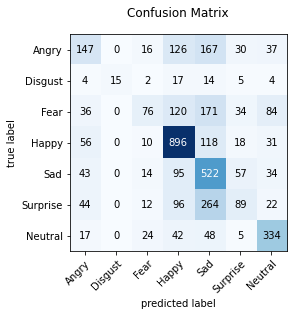

In [ ]:
#confusion matrix visualization
import seaborn as sns
import matplotlib.pyplot as plt

#f, ax=plt.subplots(figsize=(10,10))
#sns.heatmap(cm,annot=True,linewidths=0.5,linecolor="red",fmt=".0f",ax=ax)
#plt.xlabel("Y_Pred")
#plt.ylabel("y_test")
#plt.show()


# Display confusion matrix

!pip install -U mlxtend > /dev/null 2>&1

from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
class_names = ['Angry', 'Disgust', 'Fear', 'Happy', 'Sad', 'Surprise', 'Neutral']
fig, ax = plot_confusion_matrix(conf_mat=cm, class_names=class_names)
plt.title('Confusion Matrix')
plt.show()
     

In [ ]:
# accuency score 

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

classifier_train = round(classifier.score(x_train, y_train) * 100, 2)
classifier_accuracy = round(accuracy_score(Y_Pred, y_test) * 100, 2)
classifier_f1 = f1_score(Y_Pred, y_test , average=None) * 100

print("Training Accuracy    :",classifier_train,"%")
print("\033[1m---------------------------------\033[0m")
print("Model Accuracy Score :",classifier_accuracy,"%")

# print(classifier_f1)

Training Accuracy    : 99.86 %
---------------------------------
Model Accuracy Score : 52.03 %
